#TASK3 - Exploratory Data Analysis on 'SampleSuperstore' dataset <br>
##Name: Apeksha Kamath <br>
Task description - Analyse the given data and try to find the weak areas where you can work to make more profit. <br>
Dataset - https://bit.ly/3i4rbWl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/drive/My Drive/machine-learning/projects/SampleSuperstore/data.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
data.shape

(9994, 13)

In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.duplicated().sum()

17

Since the number of duplicated values is very less as compared to the total number of records in the dataset, we can delete the duplicated data

In [ ]:
data.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


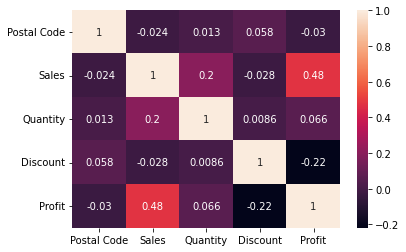

In [ ]:
sns.heatmap(data.corr(), annot = True)
plt.show()

1.   No strong positive correlation is seen between any of the atrributes.
2.   Discount and profit are negatively correlated



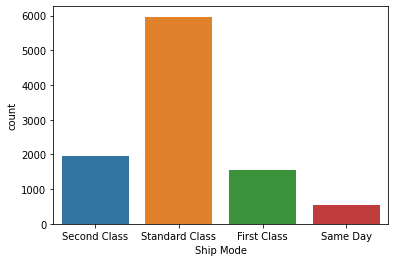

In [ ]:
sns.countplot(x = data['Ship Mode'])
plt.show()

The most used method of shipment is Standard Class mode

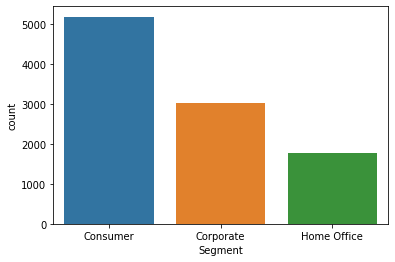

In [ ]:
sns.countplot(x = data['Segment'])
plt.show()

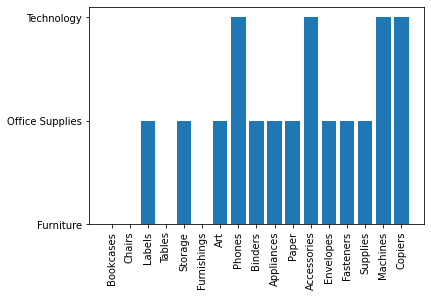

In [ ]:
plt.bar(data['Sub-Category'], data['Category'])
plt.xticks(rotation=90)
plt.show()

The items belonging to 'Office Supplies' category have the highest demand

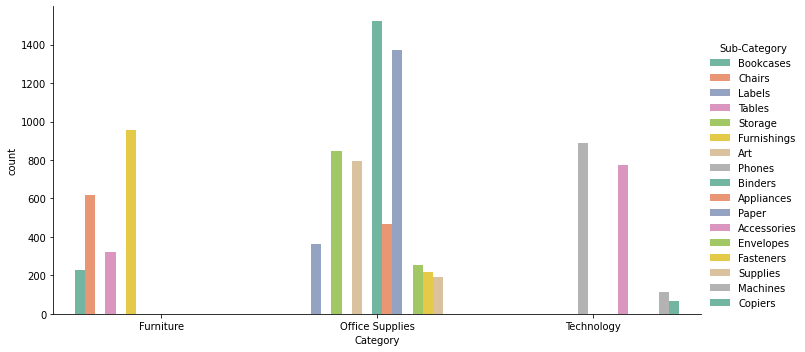

In [ ]:
sns.catplot('Category', hue='Sub-Category', data=data, kind='count', aspect=2, palette ='Set2')
plt.show()



1.   In the furnitures category, Furnishings have maximum demand
2.   In the Office Supplies category, Blinders and paper have most demand
3.   In the Technology category, phones and accessories have high demand



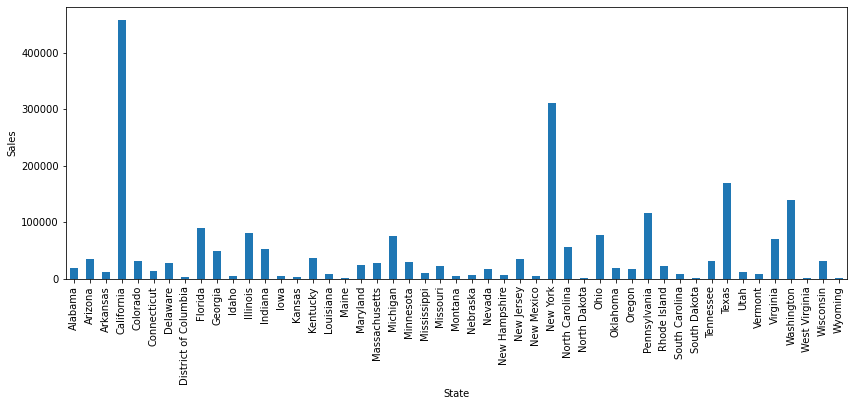

In [ ]:
plt.figure(figsize = (14,5))
data.groupby('State')['Sales'].sum().plot(kind = 'bar')
plt.ylabel('Sales')
plt.show()



1.   California and New York states have most sales which means these states have the potential to generate most of the profits.
2.   Maine, North and South Dakota, West Virginia and Wyoming have the lowest sales. 



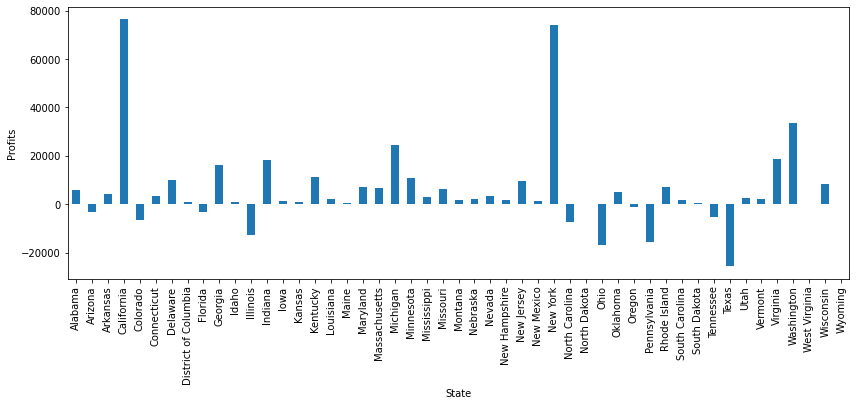

In [ ]:
plt.figure(figsize = (14,5))
data.groupby('State')['Profit'].sum().plot(kind = 'bar')
plt.ylabel('Profits')
plt.show()



1.   California and New York generate most the profits.
2.   Some states are seen to be incurring losses rendering the sales ineffective in those states.
3.   Alternatively, the period costs of some divisions are high thus causing a surge in the total cost thereby leading to loses



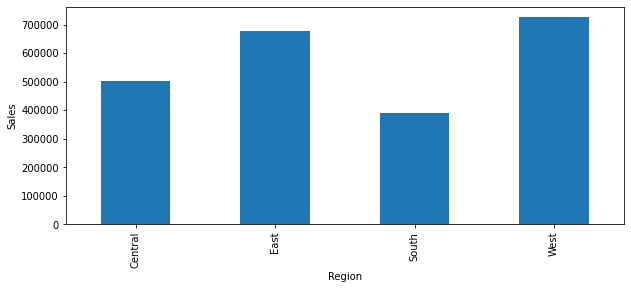

In [ ]:
plt.figure(figsize = (10,4))
data.groupby('Region')['Sales'].sum().plot(kind = 'bar')
plt.ylabel('Sales')
plt.show()



1.   Regions in the West US have the most potential customers
2.   Regions in the South have least Sales



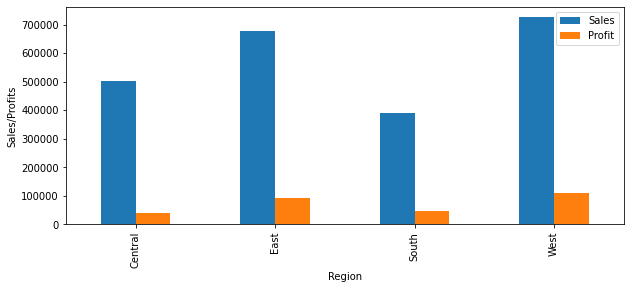

In [ ]:
data.groupby('Region')[['Sales','Profit']].sum().plot(kind = "bar", figsize =(10,4))
plt.ylabel('Sales/Profits')
plt.show()



1.   Eastern and Western regions generate most profit
2.   Least profits are generated in the Central and Southern Regions
3.   Strategies should be implemented in order to increase sales in the Southern Region and more discount can be offered in low profit generating regions.



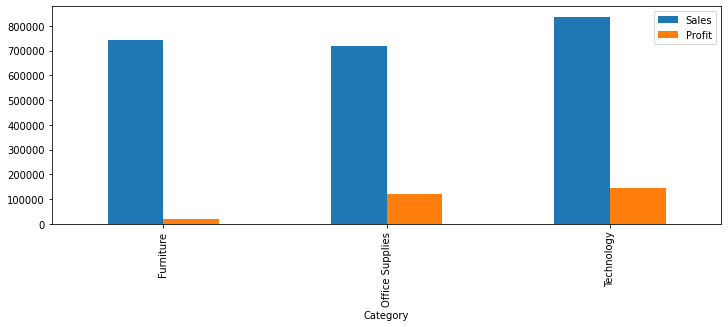

In [ ]:
data.groupby(['Category'])[['Sales', 'Profit']].sum().plot(kind ='bar', figsize =(12,4))
plt.show()



1.   The profits generated is almost equal for Office Supplies as well as Technology. However, profit generated is less as compared to Sale of Technology. 
2.   Furnitures generate least profit. Since the sales are high, prices can be increased to generate more profits.



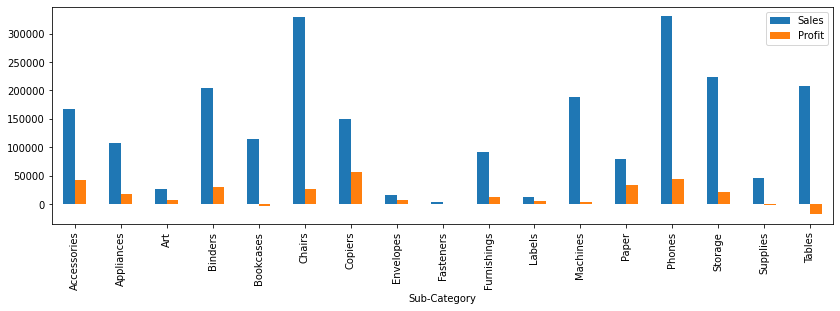

In [ ]:
data.groupby('Sub-Category')[['Sales', 'Profit']].sum().plot(kind = 'bar',figsize = (14,4))
plt.show()



1.   Efforts should be made to increase the sale of copiers and papers since both generate high profits per sale. 
2.   Some items like Bookcases, supplies and tables are leading to losses. Solutions could be to completely stop the sales of such items or focus on promotion and sales of the items.



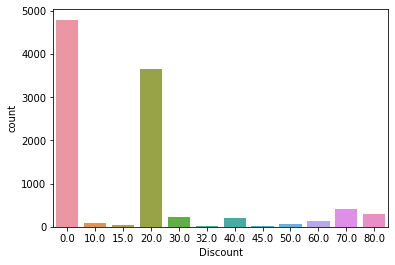

In [ ]:
sns.countplot(x = data['Discount'] * 100)
plt.xlabel("Discount %")
plt.show()

The plot shows that most items were sold at original price and a lot of items were sold at 20% discount.

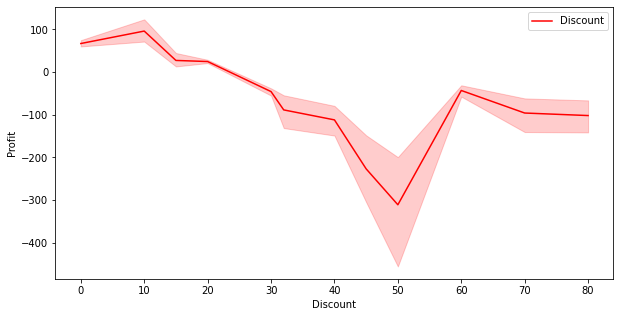

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x=data['Discount']*100,y=data['Profit'], color = 'r', label= 'Discount')
plt.show()

The plot shows that a discount in the range of 0 - 20 % generates maximum profit after which an increase in discount % increases the losses incurred.